In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [27]:
def create_matrix(a,b):
    init_matrix = np.zeros( (len(a)+1,len(b)+1), int)   #0lardan oluşan a+1 satır b+12 sütün kadar bir array oluşturuldu.
    df = pd.DataFrame(init_matrix, columns=list('-' + b), index=list('-'+ a))
    for i in range(len(a)):
        for j in range(len(b)):
                if a[i] == b[j]:
                    init_matrix[i+1][j+1]=init_matrix[i][j]+2
                else:
                    x = max(init_matrix[i][j+1]-1,init_matrix[i+1][j]-1,init_matrix[i][j]-2)
                    init_matrix[i+1][j+1]=x
                    if init_matrix[i+1][j+1] < 0:
                        init_matrix[i+1][j+1]=0
    
    #The codes in the comments below are used to print the entire matrix and create a heat table. I do not recommend using it for long texts. Compile time can take too long.
    #print(init_matrix)
    #cm = df
    #plt.figure(figsize=(8,8))
    #sn.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    #plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
    #plt.xlabel(b)
    #plt.ylabel(a)
    
    return init_matrix
    

In [28]:
def traceback(matrix,a,b,checked):
    
    k=len(b)+1
    
    maxval=0
    maxvali=0
    maxvalj=0
    
    for i in range(len(a),-1,-1):
        for j in range(len(b),-1,-1):
            if matrix[i][j]>maxval and checked[i][j] == 0:
                maxval=matrix[i][j]
                maxvali=i
                maxvalj=j
        tempi=maxvali
        tempj=maxvalj
    
        
    while tempi>0 and tempj>0:
        if checked[tempi][tempj] == 1:
            #If there is already a passed matrix element on the path, it ends the loop and calls the traceback function again as a recursion. 
            #With this statement, all non-repeating paths can be found, but for long texts, it takes a lot of compile time.
            #That's why this code stays as a comment line, but this line needs to run to find all traceback paths correctly.
            #traceback(matrix,a,b,checked)
            return
        checked[tempi][tempj]=1
        maxtraceback = max(matrix[tempi-1][tempj],matrix[tempi][tempj-1],matrix[tempi-1][tempj-1])
        if maxtraceback == 0:
            #Checks whether it has reached the end of the path.
            break
        if(maxtraceback == matrix[tempi-1][tempj-1]):
            tempi=tempi-1
            tempj=tempj-1
            continue
        if (maxtraceback == matrix[tempi-1][tempj]):
            tempi=tempi-1
            continue
        if (maxtraceback == matrix[tempi][tempj-1]):
            tempj=tempj-1
            continue

    #Prints the matched text sections to terminal.
    print("Matched text sections -> \"",a[tempi-1:maxvali],"\" and \"", b[tempj-1:maxvalj],"\"")
    
    #Creates a heatmap for matched sections between two text.
    df = np.zeros( (maxvali-tempi+1,maxvalj-tempj+1), int)
                
    for i in range(0,maxvali-tempi+1,1):
        for j in range(0,maxvalj-tempj+1,1):
            df[i][j]=matrix[i+tempi][j+tempj]
    cm = df
    plt.figure(figsize=(20,20))        
    sn.heatmap(cm, annot=True, fmt='d', cmap="Reds", linewidths=1)
    plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xlabel(b[tempj-1:maxvalj])
    plt.ylabel(a[tempi-1:maxvali])           

Matched text sections -> "  bilimaraştırma merkezleridir. i̇lk araştırma merkezlerimizden olan " and "  bilim araştırma merkezivardır. bilim ve araştırma merkezlerinde yapılan "


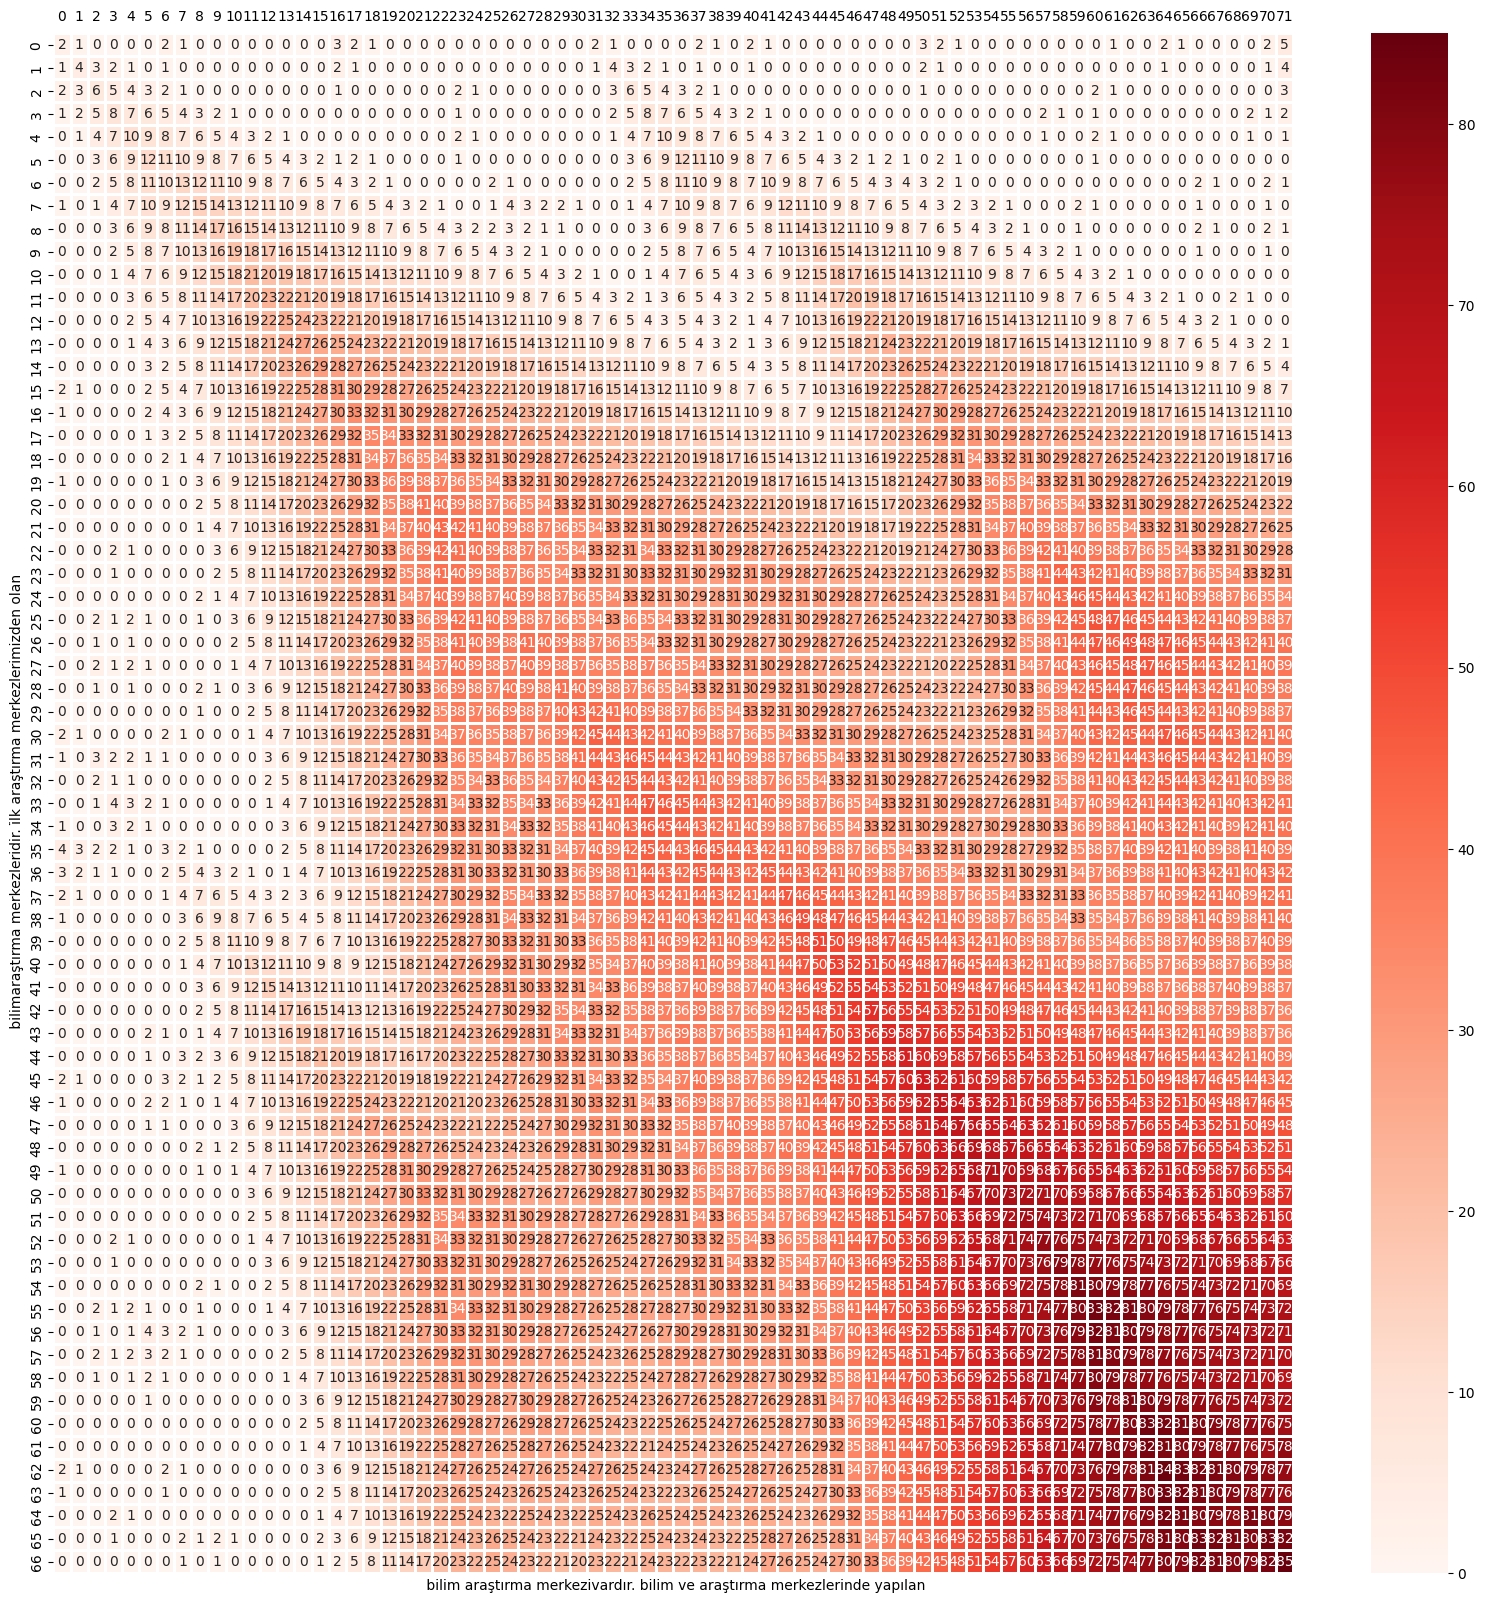

In [29]:
def wsalgorithm(txt1,txt2):
    str1 = txt1.read()
    str2 = txt2.read()

    #Edits the texts for better comparison
    str1 = str1.replace('\n', '')
    str2 = str2.replace('\n', '')

    str1 = str1.replace('\"', '')
    str2 = str2.replace('\"', '')

    str1 = str1.replace('-', '')
    str2 = str2.replace('-', '')

    str1 = str1.lower()
    str2 = str2.lower()

    #2D Checked array keeps the locations of passed matrix elements for in order to not to cross the same paths again.
    checked =  np.zeros( (len(str1)+1,len(str2)+1), int)

    #Creates full matrix for two text
    created_matrix = create_matrix(str1,str2)
    #Finds the traceback paths
    traceback(created_matrix,str1,str2,checked)

txt1 = open('textfiles/fizik1_1.txt', encoding="utf8")
txt2 = open('textfiles/fizik1_2.txt', encoding="utf8")

wsalgorithm(txt1,txt2)